In [25]:
#!import "setup.ipynb"

using PdfLexer.Writing;

## Simple Text Creation


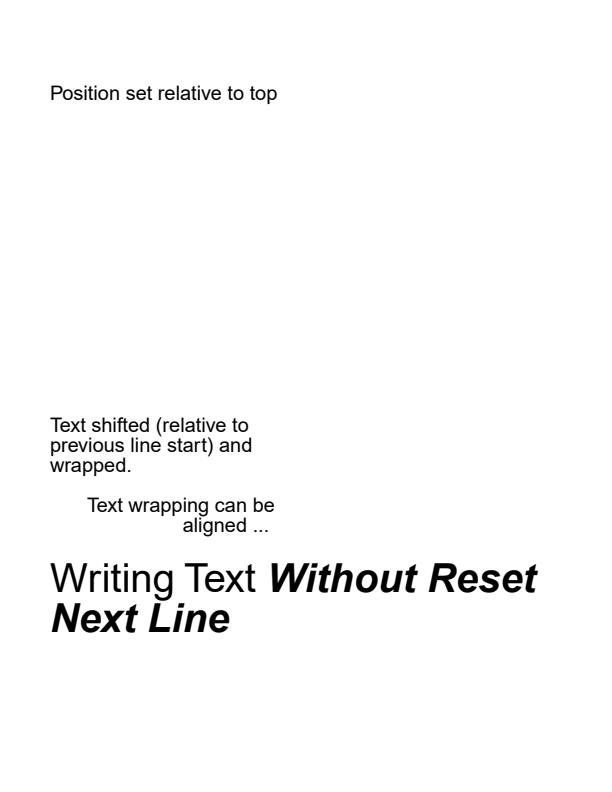

In [26]:
{
    using var doc = PdfDocument.Create();
    var pg = doc.AddPage();
    {
        using var writer = pg.GetWriter();
        writer
            .Font(Base14.Helvetica, 40)
            .TextShift(50, 200)
            .Text("Writing Text ")
            .Font(Base14.HelveticaBoldItalic, 40)
            .Text("Without Reset")
            .NewLine()
            .Text("Next Line")
            .Font(Base14.Helvetica, 20)
            .TextShift(0, 200)
            .TextWrap("Text shifted (relative to previous line start) and wrapped.", 225)
            .NewLine()
            .TextWrap("Text wrapping can be aligned ...", 225, TextAlign.Right)
            .TextMove(PdfPoint.Create(50.0, -100.0).NormalizeToTopLeft(pg))
            .Text("Position set relative to top");
    }

    display(pg);
}

## Vector Drawing


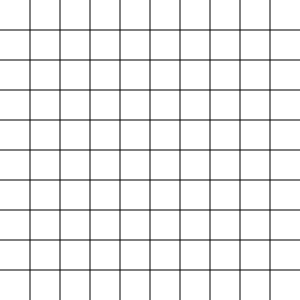

In [27]:
{
    using var doc = PdfDocument.Create();
    var pg = doc.AddPage(300, 300);
    {
        using var writer = pg.GetWriter();
        var cp = pg.CropBox;
        var dx = cp.Width / 10.0;
        var dy = cp.Height / 10.0;

        for (var i = 1; i<10; i++) 
        {
            writer
                .MoveTo(dx*i, cp.LLy)
                .LineTo(dx*i, cp.URy)
                .Stroke();
        }

        for (var i = 1; i<10; i++) 
        {
            writer
                .MoveTo(cp.LLx, dy*i)
                .LineTo(cp.URx, dy*i)
                .Stroke();
        }      

    }

    display(pg);
}

## Experimental Text Box


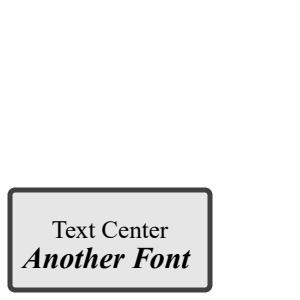

In [28]:
using PdfLexer.Writing.TextLayout;
{
    using var doc = PdfDocument.Create();
    var pg = doc.AddPage(300, 300);
    {
        using var writer = pg.GetWriter();
        var rect = new PdfRect<double> { LLx = 10,  LLy = 10, URx = 210,  URy = 110 };

        writer
            .SetFillGray(0.9)
            .SetStrokingGray(0.25)
            .LineWidth(5)
            .RoundedRect(rect, 5)
            .FillAndStroke();

        writer
            .SetStrokingGray(0)
            .SetFillGray(0)
            .Font(Base14.TimesRoman, 25)
            .TextBox(rect, TextAlign.Center) // TEXT BOX IS EXPERIMENTAL
            .TextBoxWrite("Text Center")
            .TextBoxFont(Base14.TimesRomanBoldItalic, 30)
            .TextBoxWrite("Another Font")
            .TextBoxComplete(VerticalAlign.Center);
    }

    display(pg);
}
 